In [26]:
import csv
f=open('/Users/sunhop/Desktop/Galaxy data/Numb.csv')
reader = csv.reader(f)
for row in reader:
    p = '/Users/sunhop/Desktop/Galaxy data/images_training_rev1/'+str(row[0])+'.jpg'     
    data=Image.open(p)
    plt.imshow(data)
    xsize,ysize=data.size
    #print(xsize,ysize)
    box=(142,142,282,282)
    roi=data.crop(box)
    #plt.imshow(roi)
    roi.save('/Users/sunhop/Desktop/tdata/VAE_data/'+str(row[0])+'.jpg')
    

In [1]:
import os
from PIL import Image
import numpy as np
#os.chdir('/Users/sunhop/Desktop/')
def load_data():
    
    #label = np.empty((42000,),dtype="uint8")
    
    imgs = os.listdir("/Users/sunhop/Desktop/tdata/VAE_data")
    data = np.empty((len(imgs),140,140,3),dtype="float32")
    num = len(imgs)
    for i in range(num):
        img = Image.open("/Users/sunhop/Desktop/tdata/VAE_data/"+imgs[i])
        arr = np.asarray(img,dtype = "float32")
        data[i,:,:,:] = arr
        #label[i] = int(imgs[i].split('.')[0])
    data =data/ np.max(data)
    data =data- np.mean(data)
    
    return data#,label

In [2]:
data = load_data()

In [3]:
data.shape
data_little = data[:1500]

In [4]:
import pandas as pd
labeldata = pd.read_csv("/Users/sunhop/Desktop/tdata/1500fig/label_1500.csv")

In [5]:
labelarr = np.asarray(labeldata)
#分类方法2：取最大值为分类
label_max = np.zeros((1500,4))
for i in range(len(labelarr)):
    label_max[i,0] = labelarr[i,0]
    if labelarr[i,1] == max(labelarr[i,1:]):
        label_max[i,1] = 1
    else:
        if labelarr[i,2] == max(labelarr[i,1:]):
            label_max[i,2] = 1
        else:
            if labelarr[i,3] == max(labelarr[i,1:]):
                label_max[i,3] = 1

In [6]:
label_max =label_max[:,1:3]

In [7]:
label_max

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [9]:
data_little.shape

(1500, 140, 140, 3)

In [17]:
'''''This script demonstrates how to build a variational autoencoder with Keras. 
 
Reference: "Auto-Encoding Variational Bayes" https://arxiv.org/abs/1312.6114 
'''  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import norm  
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape
from keras.layers import Input, Dense, Lambda  
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys  
  

batch_size = 100  

latent_dim = 2
#original_dim =
nb_epoch = 50  
epsilon_std = 1.0  
  
#my tips:encoding  




input_img = Input(shape=(140,140,3))
# "encoded" is the encoded representation of the input
#encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
x = Conv2D(80, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(input_img)
x = MaxPooling2D((2, 2),  padding='same')(x)

x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
x = MaxPooling2D((2, 2),  padding='same')(x)

x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
x = MaxPooling2D((2, 2),  padding='same')(x)

x = Conv2D(10, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
encoded = MaxPooling2D((2, 2),  padding='same')(x)



x = Conv2D(10, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(80,  (3, 3), activation='relu',padding='valid',kernel_initializer='normal')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
#decoded = tf.reshape(decoded,[-1,160*160])

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')




newdata = data_little
index = [i for i in range(len(newdata))]
import random
random.shuffle(index)
newdata = newdata[index]
x_train = newdata[:1000]
x_test = newdata[1000:1500]
label_max = label_max[index]


import keras
EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

In [18]:
autoencoder.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=nb_epoch,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test),callbacks=[EarlyStopping])  

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1000 samples, validate on 500 samples
Epoch 1/50
1000/1000 [==============================] - 115s - loss: 0.6856 - val_loss: 0.6693
Epoch 2/50
1000/1000 [==============================] - 108s - loss: 0.5629 - val_loss: 0.1243
Epoch 3/50
1000/1000 [==============================] - 109s - loss: -0.2348 - val_loss: -0.4787
Epoch 4/50
1000/1000 [==============================] - 112s - loss: -0.5741 - val_loss: -0.6545
Epoch 5/50
1000/1000 [==============================] - 120s - loss: -0.7337 - val_loss: -0.7446
Epoch 6/50
1000/1000 [==============================] - 120s - loss: -0.7745 - val_loss: -0.7624
Epoch 7/50
1000/1000 [==============================] - 113s - loss: -0.7956 - val_loss: -0.7829
Epoch 8/50
1000/1000 [==============================] - 110s - loss: -0.8110 - val_loss: -0.7806
Epoch 9/50
1000/1000 [==============================] - 110s - loss: -0.8106 - val_loss: -0.7893
Epoch 10/50
1000/1000 [==============================] - 111s - loss: -0.8205 - val_

KeyboardInterrupt: 

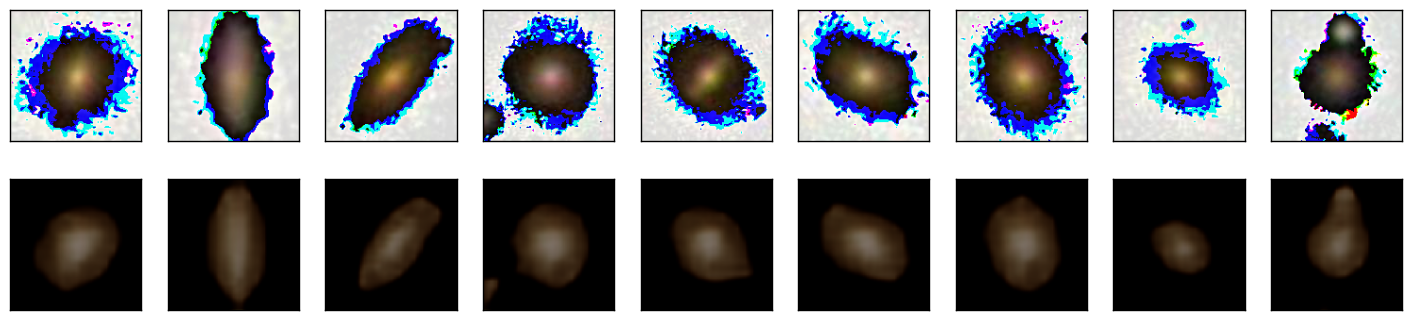

In [22]:
# encode and decode some digits
# note that we take them from the *test* set
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

#encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test,batch_size=100)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2,n,i)
    plt.imshow((x_test[i]))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n ,i + n)
    plt.imshow((decoded_imgs[i]))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
label_two = np.zeros((1500,1))
for i in range(len(label_max)):
    if label_max[i][1]==1:
        label_two[i]=1
encoder = Model(input_img, encoded)
  
# display a 2D plot of the digit classes in the latent space  
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
#
plt.scatter( x_test_encoded[:, 0] ,x_test_encoded[:, 1], c=label_two[1000:])  
plt.colorbar()  
plt.show()  




In [35]:
x_test_encoded.shape

(500, 9, 9, 10)